In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
from tradingSimulator import TradingSimulator
from tradingEnv import TradingEnv
from TDQN import TDQN
from displayManager import *

matplotlib.use("Agg")
matplotlib.rcParams['interactive'] = True
# matplotlib.rcParams['figure.figsize'] = (18.0, 8.0)
# matplotlib.rcParams['animation.ffmpeg_path'] = 'D:\\Users\\amine\\AppData\\Local\\Microsoft\\WinGet\\Packages\\Gyan.FFmpeg_Microsoft.Winget.Source_8wekyb3d8bbwe\\ffmpeg-6.0-full_build\\binffmpeg.exe'

In [2]:

strategy = "TDQN"
stocks = ["AAPL", "TSLA"]
startingDate = '2012-1-1'
endingDate = '2020-1-1'
splitingDate = '2018-1-1'
numberOfEpisodes = 50
stateLength = 30
money = 10000
actionSpace = 2
stateLength = 30
observationSpace = 1 + (stateLength-1)*4
percentageCosts = [0, 0.1, 0.2]
transactionCosts = percentageCosts[1]/100

# Plotting settings
trainShowPerformance = True 
trainPlot = True
plotTrainEnv = True
interactiveTest = True
testShowPerformance = True
testPlotQValues = True
testOnLiveData = False

# Init simulator instance
simulator = TradingSimulator()

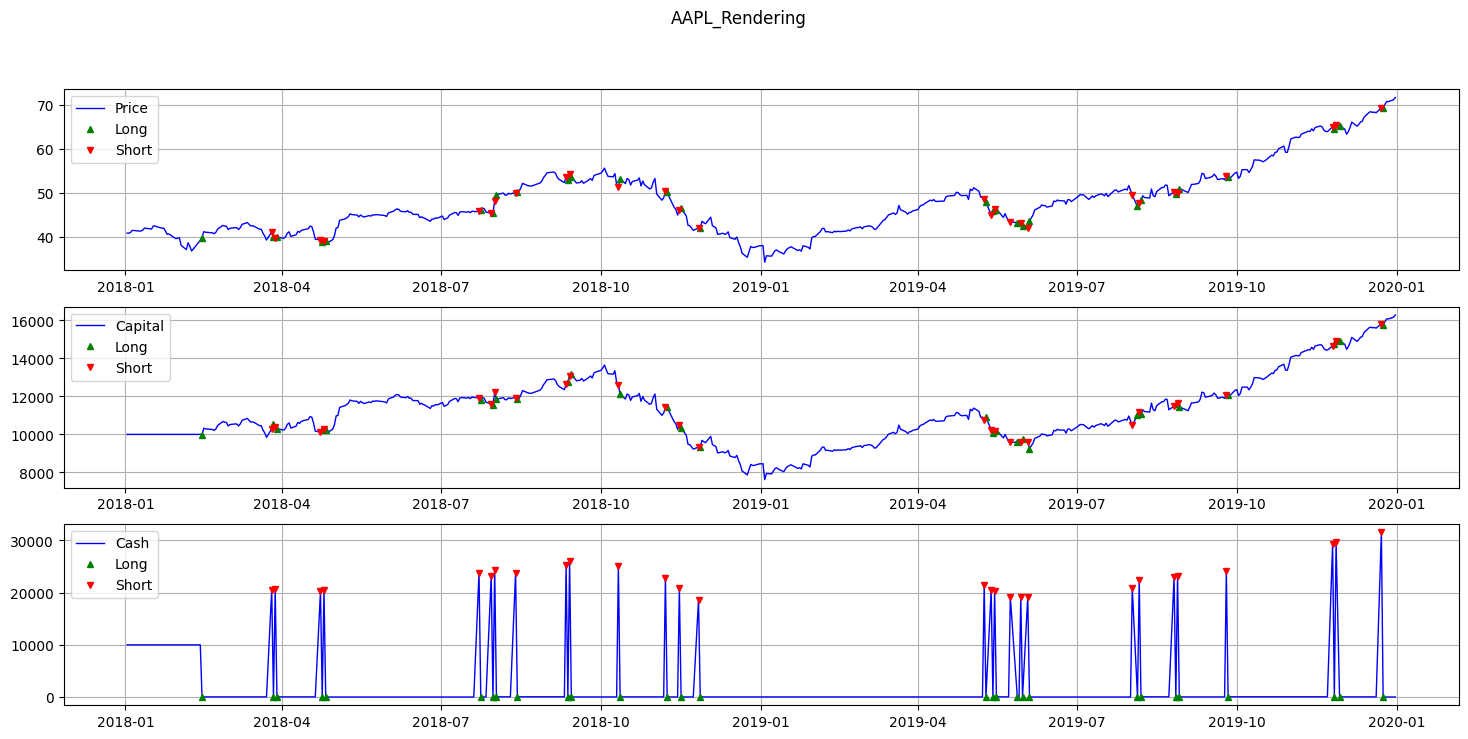

<Figure size 1800x800 with 0 Axes>

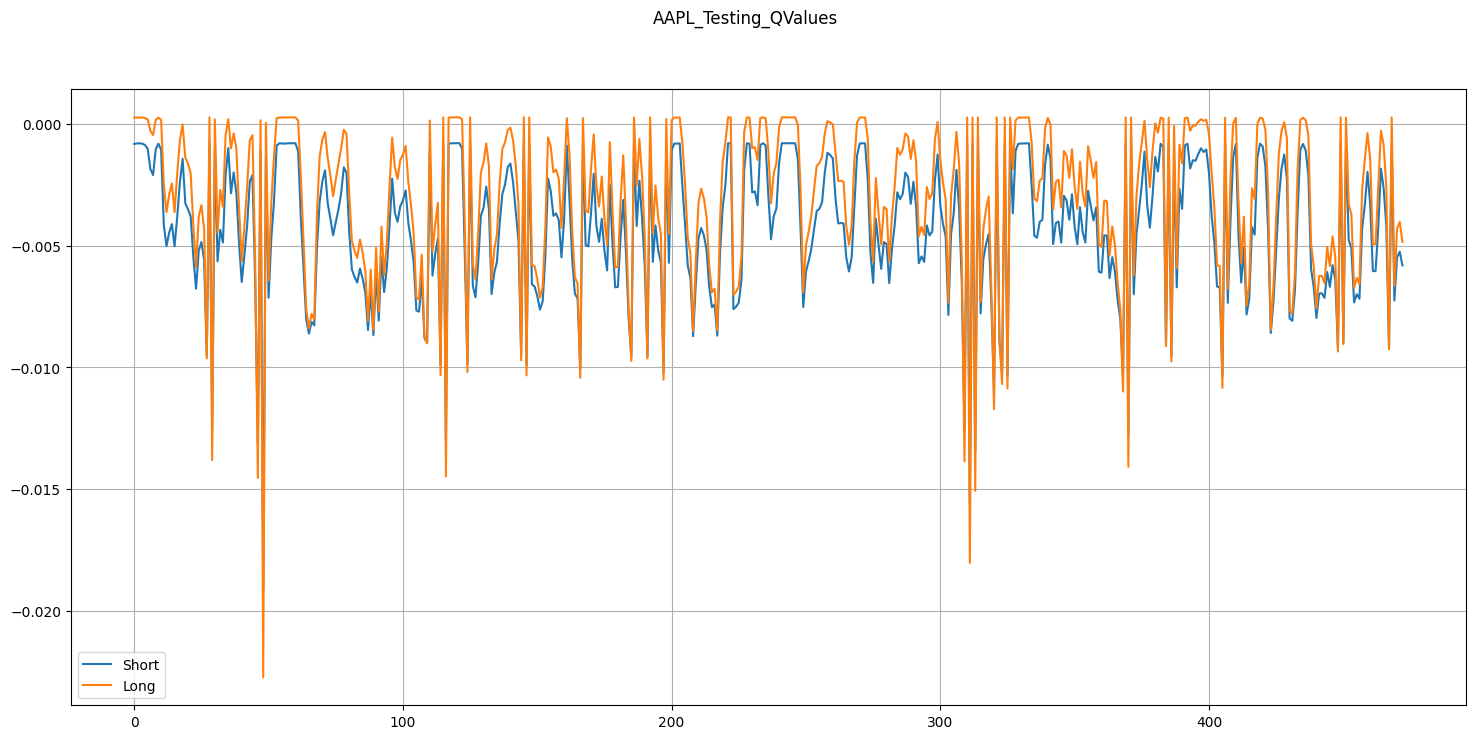

╒═══════════════════════════╤══════════════════╕
│   Performance Indicator   │  TDQN (Testing)  │
╞═══════════════════════════╪══════════════════╡
│    Profit & Loss (P&L)    │       6288       │
├───────────────────────────┼──────────────────┤
│     Annualized Return     │      24.91%      │
├───────────────────────────┼──────────────────┤
│   Annualized Volatility   │      26.50%      │
├───────────────────────────┼──────────────────┤
│       Sharpe Ratio        │      1.056       │
├───────────────────────────┼──────────────────┤
│       Sortino Ratio       │      1.323       │
├───────────────────────────┼──────────────────┤
│     Maximum Drawdown      │      44.20%      │
├───────────────────────────┼──────────────────┤
│ Maximum Drawdown Duration │     62 days      │
├───────────────────────────┼──────────────────┤
│       Profitability       │      57.89%      │
├───────────────────────────┼──────────────────┤
│ Ratio Average Profit/Loss │      1.338       │
├───────────────────

In [3]:
stock = simulator.getStock(stocks[0])

tradingStrategy = TDQN(observationSpace, actionSpace)
tradingStrategy.loadModel(f"Models/vanilla_{strategy}_{stock}.model")

trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts, liveData=testOnLiveData)

testingEnv = tradingStrategy.testing(trainingEnv,
                                     testingEnv,
                                     rendering=DisplayOption(False, testPlotQValues, False),
                                     showPerformance=testShowPerformance,
                                     interactiveTradingGraph=interactiveTest)

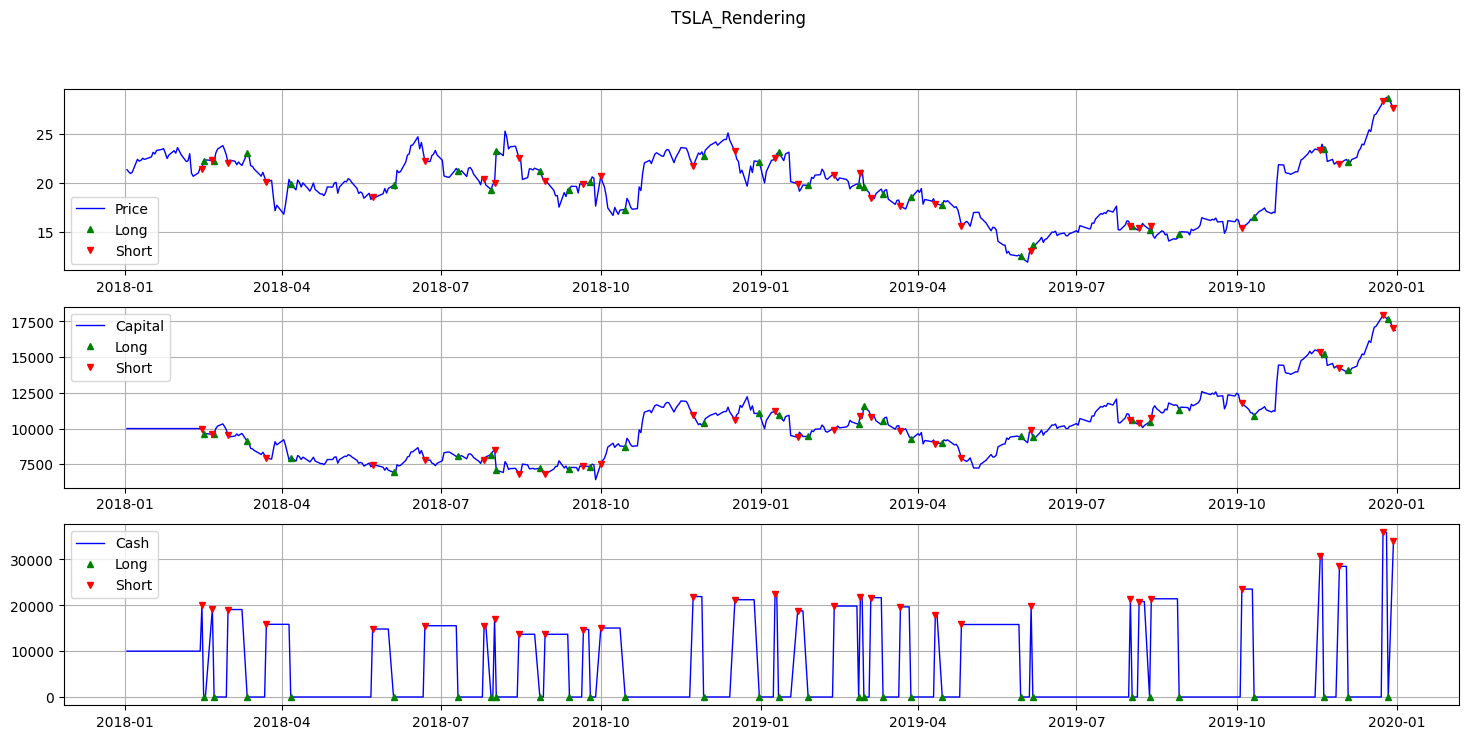

<Figure size 1800x800 with 0 Axes>

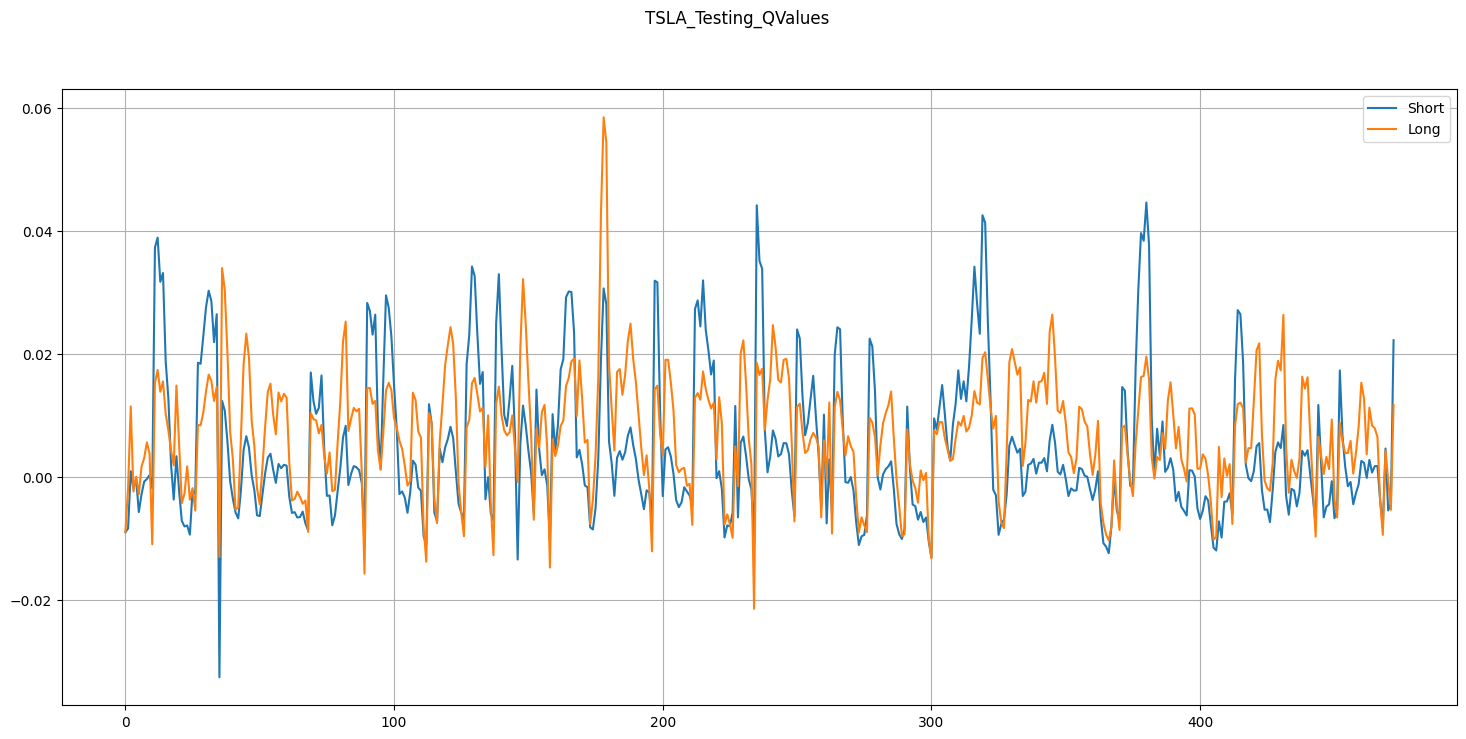

╒═══════════════════════════╤══════════════════╕
│   Performance Indicator   │  TDQN (Testing)  │
╞═══════════════════════════╪══════════════════╡
│    Profit & Loss (P&L)    │       6873       │
├───────────────────────────┼──────────────────┤
│     Annualized Return     │      33.89%      │
├───────────────────────────┼──────────────────┤
│   Annualized Volatility   │      51.77%      │
├───────────────────────────┼──────────────────┤
│       Sharpe Ratio        │      0.764       │
├───────────────────────────┼──────────────────┤
│       Sortino Ratio       │      1.084       │
├───────────────────────────┼──────────────────┤
│     Maximum Drawdown      │      40.84%      │
├───────────────────────────┼──────────────────┤
│ Maximum Drawdown Duration │     90 days      │
├───────────────────────────┼──────────────────┤
│       Profitability       │      50.82%      │
├───────────────────────────┼──────────────────┤
│ Ratio Average Profit/Loss │      1.396       │
├───────────────────

In [6]:
stock = simulator.getStock(stocks[1])

tradingStrategy = TDQN(observationSpace, actionSpace)
tradingStrategy.loadModel(f"Models/vanilla_{strategy}_{stock}.model")

trainingEnv = TradingEnv(stock, startingDate, splitingDate, money, stateLength, transactionCosts)
testingEnv = TradingEnv(stock, splitingDate, endingDate, money, stateLength, transactionCosts, liveData=testOnLiveData)

testingEnv = tradingStrategy.testing(trainingEnv,
                                     testingEnv,
                                     rendering=DisplayOption(False, testPlotQValues, False, False),
                                     showPerformance=testShowPerformance,
                                     interactiveTradingGraph=interactiveTest)